<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Supervised_Learning/Neural%20Networks/Refined_ReLU_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Implementation
## Introduction
A neural network is a system involving the collaboration of many neurons which function in a series of rows, taking inputs from the previous row with various weights and sending their outputs to the next. The very front row, in this example, takes data from a flattened image of a handwritten number. The final row represents some kind of likelihood based on the trained neural network's results of what that handwritten number is from the picture input.

## Imports and Data Loading

In [ ]:
# install the libraries and data needed for the problem
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

train_y[0] = 5 



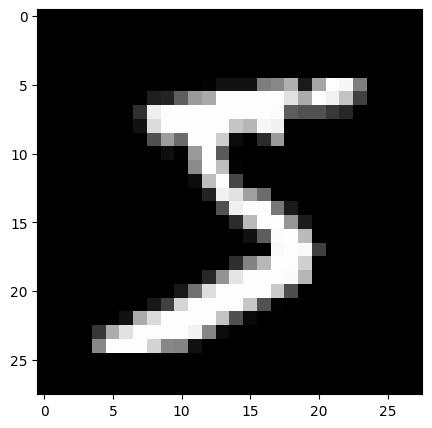

In [ ]:
#view the image of one of the matrices to briefly verify the data
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()

## Split the Data into Training and Testing
To verify the model after training, we need a fresh group of data which was not used for training purposes. Therefore, the collective data is split into two groups.

In [ ]:
# separate the data into training and testing sections:
train_X = train_X/255
test_X = test_X/255

# For the training data, flatten images into column vectors and one-hot-encode training labels
flat_train_X = []
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)

# For the testing data, flatten and one-hot encode
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)


## Writing Functions and Initializing
In this example, ReLU (rectified linear unit) is used for the activation and MSE (mean squared error) is used for the cost. The neural network will have 3 layers, with the last (or output) layer producing probabilities that a given number is depicted in the original image.

In [ ]:
# For activation function, use the ReLU (rectified linear unit) function
# For cost function, use mean square error cost (mse)
# to implement this, need activation function (relu) and its derivative (d_relu)

def relu(z):
    return np.maximum(0, z)

def d_relu(z):
    return np.where(z > 0, 1, 0)

def mse(a,y):
    return .5*sum((a[i] - y[i])**2 for i in range (10))[0]

#relu(z): This function takes the input z and returns the maximum of 0 and z, effectively applying the ReLU transformation.
#d_relu(z): This function computes the derivative of ReLU. It returns 1 where z is greater than 0 and 0 otherwise, which is useful for backpropagation in neural networks.

In [ ]:
# function to initialize weight matrices and bias column vectors
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])

        W.append(w_temp)
        B.append(b_temp)
    return W, B


In [ ]:
#Implementing softmax to convert numerical output of final layer into probabilities
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # For numerical stability
    return exp_z / np.sum(exp_z, axis=0)

# preactivation and postactivation phase between layers, "feedforward process"
# Initialize weights and biases
W, B = initialize_weights()

# Get a single training example
xi = flat_train_X[0]
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

# First layer
z1 = W[1] @ a0 + B[1]
a1 = relu(z1)  # Use ReLU here

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

# Second layer
z2 = W[2] @ a1 + B[2]
a2 = relu(z2)  # Use ReLU here

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

# Third layer (output layer)
z3 = W[3] @ a2 + B[3]
a3 = softmax(z3)  # Apply softmax to get probabilities
y_hat = a3

print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")

# Prediction and evaluation
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")  # Ensure mse is suitable for your problem


np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 1
Target Label: np.argmax(yi) = 5
mse(y_hat, yi) = 0.4791725967204399


## Test Model Predictions (Before Training)
Test out the functions using a random experiment to verify. The model, since it's not trained yet, should have a high error.

In [ ]:
# put into a function and wrap in a for loop
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)

        a = relu(z)
        A.append(a)

    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 1
Target Label: np.argmax(yi) = 5
mse(y_hat, yi) = 0.8597205450442953


In [ ]:
# Predict on a random data point
# write an mse function that computer error over an entire set of features/labels

def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")


def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [ ]:
# test it

print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 0.821074350886074 

Actual label: 3
Predicted label: 1


## Make Class and Initialize Neural Network


In [ ]:
# make a class that initializes the weights and bias for the network
# implement stochastic gradient descent

class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent.
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # GPT:Compute the output error (use softmax and cross-entropy instead)
                output_error = A[L] - yi  # This assumes A[L] is already softmaxed

                # GPT:You don't need d_sigmoid here since you're using softmax
                deltas[L] = output_error  # No activation function applied after softmax


                # Loop from L-1 to 1. Recall the right entry of the range function
                # is non-inclusive.
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    #deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])
                    deltas[i] = (self.W[i+1].T @ deltas[i+1]) * d_relu(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient
                # descent.
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")


    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 0.6441634643544764 

predicted digit is: 7
actual digit is: 3


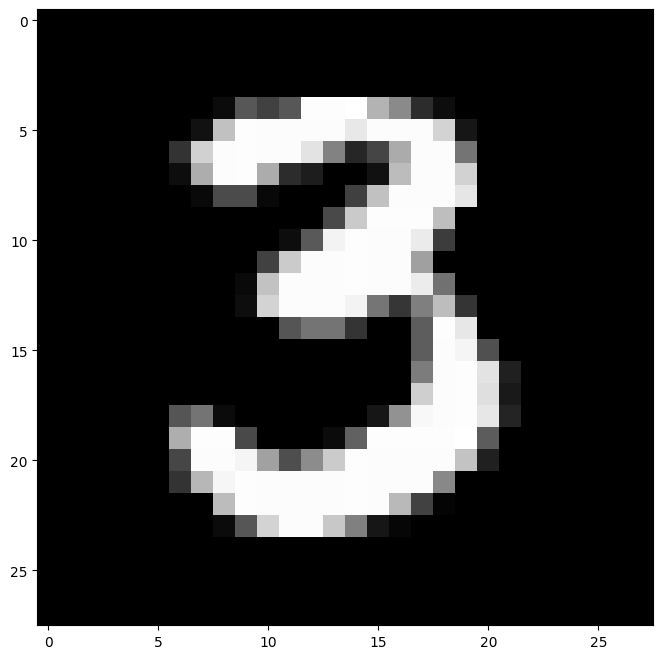

In [ ]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each
# and a output layer with 10 nodes.
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

#noticed this ReLU approach is slightly faster than the lecture code, which was done with sigmoid

## Train the Network
Using the half of data set aside for training and the class developed above, train the neural network on the images to make more accurate predictions.

In [ ]:
#Train the network using stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)
#finished in 5 min and 35 sec, compared to lecture sigmoid's 6 min and 23 sec
#4-epoch cost of 0.018658, compared to lecture's 0.032786

Starting Cost = 0.6441634643544764
1-Epoch Cost = 0.039979741548699516
2-Epoch Cost = 0.0293216520680808
3-Epoch Cost = 0.023359975104599622
4-Epoch Cost = 0.018658343124590714


## Visualize the Training and Results
One way to see how the model improves over time is to observe how the error (in this case, MSE) decreases over time spent training. This plot is shown below, as well as a few examples of successful tests on the group of data reserved for testing/verification.

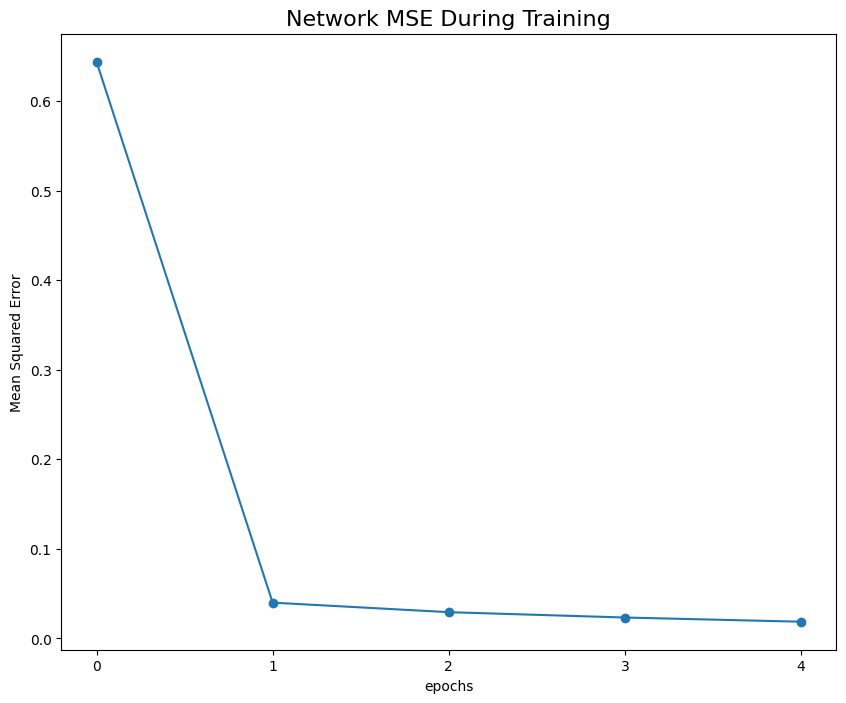

In [ ]:
# Visualize the mean squared error over the training process
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()


predicted digit is: 5
actual digit is: 5


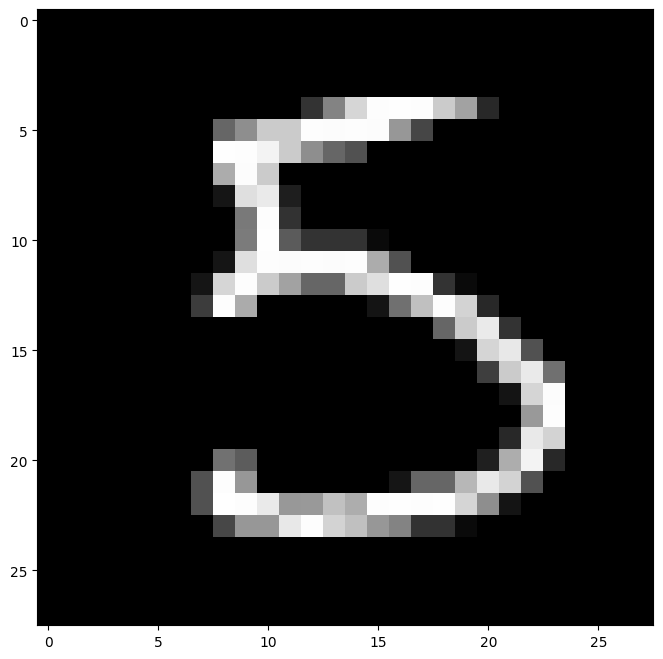

In [ ]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 7
actual digit is: 7


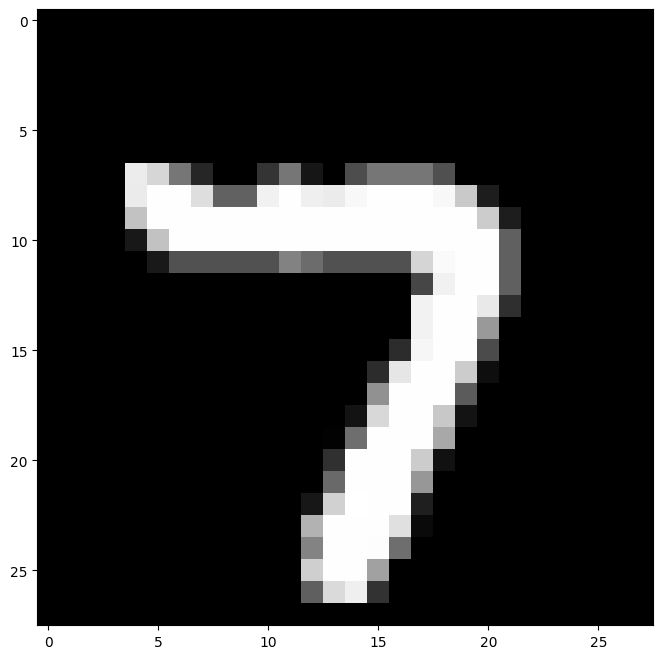

In [ ]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 9
actual digit is: 9


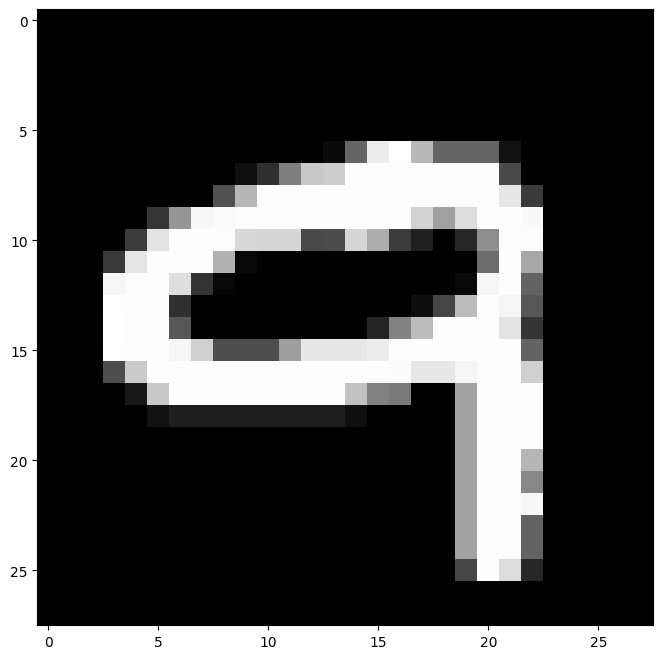

In [ ]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [ ]:
# Calculate classification accuracy of trained model
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

# Approx 1.5% better performance than sigmoid lecture code

0.9694

The overall accuracy on the testing data is 96.94% in this example, which was about 1.5% better performance using ReLU than sigmoid. The neural network model can correctly classify the handwritten number about 97% of the time after being trained!